In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


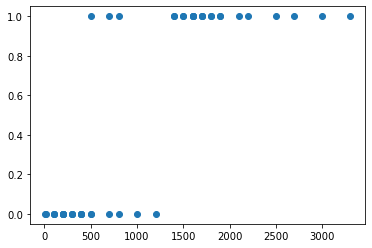

In [4]:
base = pd.read_csv('../../Arquivos/Eleicao.csv', sep = ';')
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()


In [5]:
np.corrcoef(base.DESPESAS, base.SITUACAO)


array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [13]:
x = base.iloc[:,2].values
x = x[:, np.newaxis]
y = base.iloc[:, 1].values
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]], dtype=int64)

In [14]:
#criação do modelo, treinamento e visualização dos coeficientes

modelo = LogisticRegression()
modelo.fit(x,y)
modelo.coef_
modelo.intercept_

array([-4.60287217])

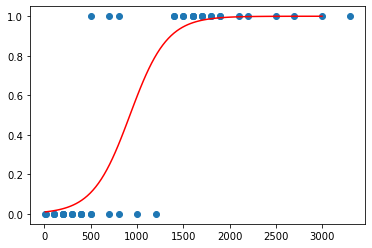

In [16]:
plt.scatter(x,y)
#geração de novos dados para gerar a função signoide
x_teste = np.linspace(10, 3000, 100)
#implementação da função signoide
def model(x):
    return 1/(1 + np.exp(-x))
#geração de previsões e visualização dos resultados
r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(x_teste,r,color='red')


In [18]:
#nova base
base_previsoes = pd.read_csv('../../Arquivos/NovosCandidatos.csv', sep=';')
base_previsoes


,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [20]:
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)
previsoes_teste = modelo.predict(despesas)
previsoes_teste


array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [21]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes


array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)